# ObsID : 0945020136, SRCNUM : 4, Instru : EMOS2
**Simbad :** Galaxy (2dFGRS TGS322Z047) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%404738151&Name=2dFGRS%20TGS322Z047&submit=submit

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [2]:
Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945020136_SRCNUM4_EMOS2_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.295e-03 +/- 1.203e-03 (71.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-3
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 7690 sec
 Using fit statistic: chi
 Using Background File                ObsID0945020136_SRCNUM4_EMOS2_background_spectrum.fits
  Background Exposure Time: 7690 sec
 Using Response (RMF) File            ObsID0945020136_SRCNUM4_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020136_SRCNUM4_EMOS2.arf



## Plot spectrum

In [3]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

(-0.5, 856.5, 662.5, -0.5)

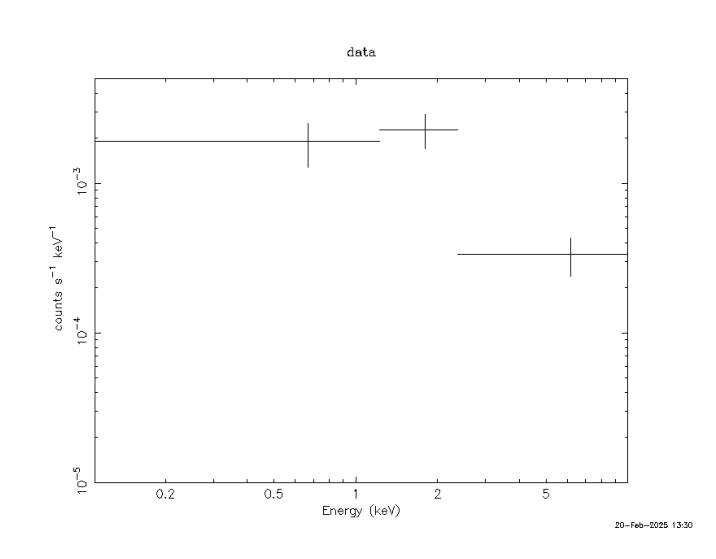

In [4]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.044025e+11     using 3 bins.

Tes

GammQ: A <=  0
GammQ: A <=  0


5e-06
***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 8.93008e-19 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
1.68008      524425       -2   8.93008e-19      0.853804   2.44911e-06
1.67935      28880.6      -3   8.93008e-19      0.851913   2.43331e-06
1.67934      42.7628      -4   8.93008e-19      0.851618   2.43237e-06
***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 8.93008e-19 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
1.67934      1.25049      -3   8.93008e-19      0.851581   2.43225e-06
 Variances and Principal Axes
                 2        3  
 1.6666E-13| -0.0000   1.0000  
 2.4004E-02|  1.0000   0.0000  
------------------------------

  Covariance Matrix
        1           2   
   2.400e-02   7.749e-08
   7.749e-08   4.168e-13
------------------------

Model TBabs<1>*bbody<2> Sourc

(-0.5, 852.5, 655.5, -0.5)

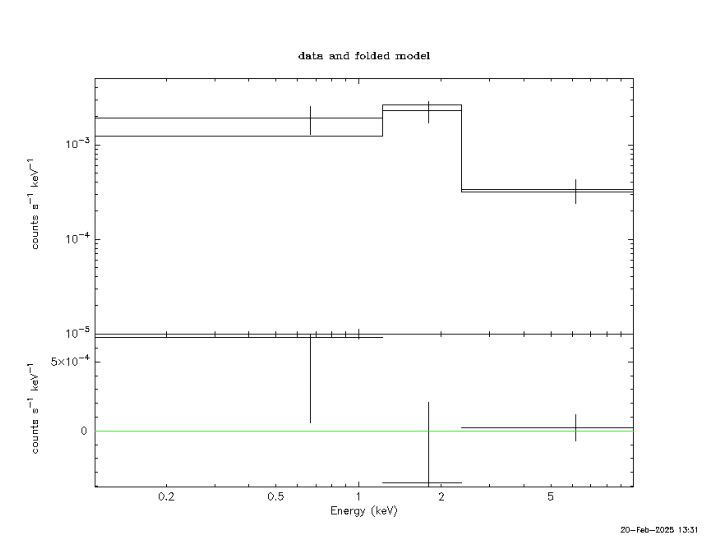

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.117834e+09     using 3 bins.

Test statistic : Chi-Squared              4.117834e+09     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
2.0691       0.871452     -1      0.392959       8.43842   6.36504e-05
0.547037     4277.01      -1      0.114601       15.9199   5.05787e-05
0.393385     9055.3       -2     0.0584139       43.9824   5.80142e-05
0.146184     1766.92      -

GammQ: A <=  0
GammQ: A <=  0


  0.0810956       199.363   9.22102e-05
 Variances and Principal Axes
                 1        2        3  
 2.2249E-10| -0.0001  -0.0000   1.0000  
 1.0063E-02|  1.0000   0.0001   0.0001  
 6.1194E+06| -0.0001   1.0000   0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   2.959e-02  -3.457e+02  -4.577e-05
  -3.457e+02   6.119e+06   8.333e-01
  -4.577e-05   8.333e-01   1.139e-07
------------------------------------

Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    8.10956E-02  +/-  0.172019     
   2    2   bremss     kT         keV      199.363      +/-  2473.74      
   3    2   bremss     norm                9.22102E-05  +/-  3.37447E-04  
________________________________________________________________________


Fit statistic  : Chi-Squared                  0.0533     using 3 bins.

Test statistic : Chi-Squared         

(-0.5, 857.5, 660.5, -0.5)

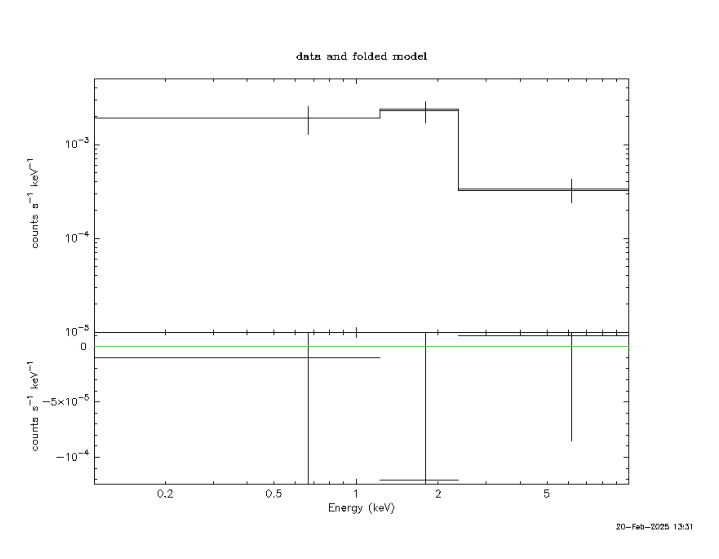

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp


GammQ: A <=  0
GammQ: A <=  0


   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              6.041075e+08     using 3 bins.

Test statistic : Chi-Squared              6.041075e+08     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
7.32079      1.29997      -3      0.445316       4.31008   0.000110151
1.32248      25368.3      -1      0.180763       9.12073   0.000126791
0.472007     11256.6      -2     0.0871101       25.69

(-0.5, 860.5, 664.5, -0.5)

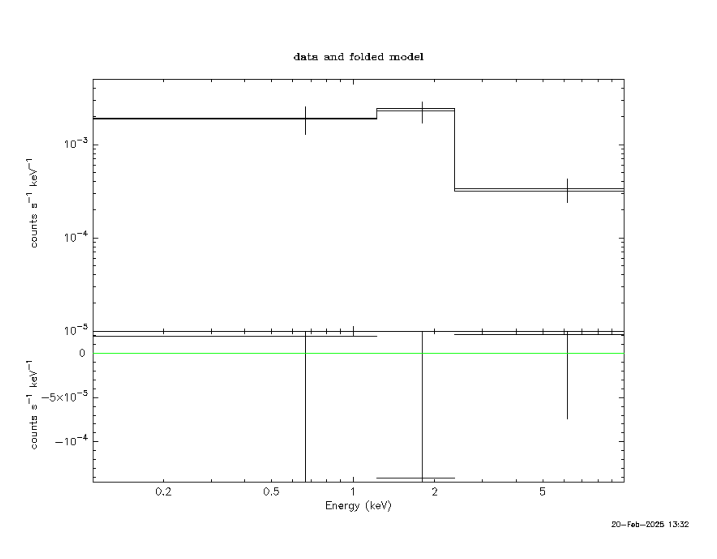

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [11]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.591654e+10     using 3 bins.

Test statistic : Chi-Squared              2.591654e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
8.79236      1.70719      -2      0.419115      0.587770   1.55656e-05
4.75221      64573.1      -1     0.0883413      0.698173   1.42276e-05
0.532284     155655       -2     0.0388012       1.00335   2.13947e-05
0.00401432   59501.5     

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 856.5, 660.5, -0.5)

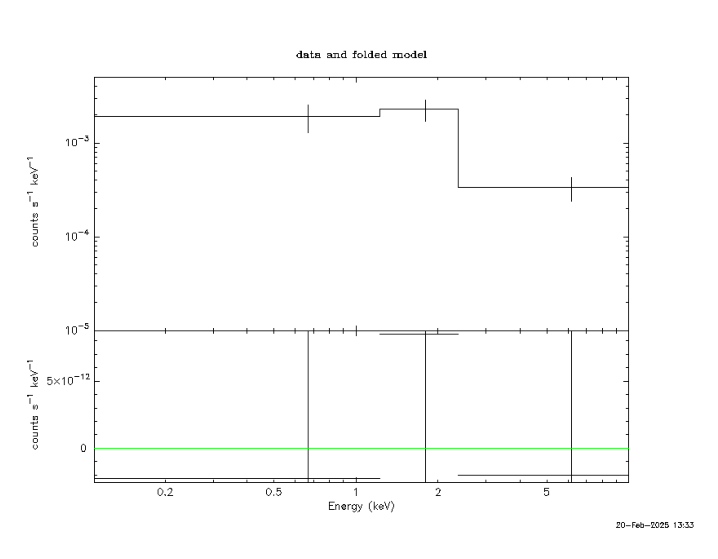

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Flux

In [13]:
AllModels.calcFlux(".2 12.0")

 Model Flux 7.9005e-05 photons (4.1653e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
Flux = 4.1653e-13 # ergs/cm^2/s

### ESASky

https://sky.esa.int/esasky/?target=52.97008333333333%20-28.304833333333328&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033152.7-281818
- IAU name : 4XMM J033152.7-281818
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.16"

``GAIA``

- Designation : Gaia DR3 5057378691743871360
- RA : 03h 31m 52.742s
- DEC : -28° 18' 18.52"
- Parallax : -0.7065 mas

``GLADE``

- No : 2 124 866
- RA : 03h 31m 52.754s
- DEC : -28° 18' 18.08"
- Distance : 289.8972 Mpc

``2MASS``

- Name : 03315275-2818185
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.57"

### Luminosity

In [16]:
"""GAIA"""

P_mas = 0.7065 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosity : {Luminosity} erg/s")
print()

"""GLADE"""

d_kpc = 289897.2 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GLADE)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosity : {Luminosity} erg/s")

(GAIA)
Distance : 4.3675866949752303e+21 cm
Luminosity : 9.984796524286754e+31 erg/s

(GLADE)
Distance : 8.945357900400001e+26 cm
Luminosity : 4.1884331938765736e+42 erg/s
